In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [39]:
df = pd.read_csv('./data/product_with_attributes.csv')
df.head()

,cod_modelo_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,...,neck_lapel_type,woven_structure,knit_structure,heel_shape_type,length_type,sleeve_length_type,toecap_type,waist_type,closure_placement,cane_height_type
0,83_1124642,Female,Kids,KIDS,TRICOT,Tops,Sweaters and Cardigans,Sweater,Sweater,83_1124642_17074019-82_B.jpg,...,Redondo,INVALID,Punto Fino,INVALID,Standard,Larga,INVALID,INVALID,Cuello,INVALID
1,86_1215223,Female,Kids,KIDS,WOVEN,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,86_1215223_47014392-01_B.jpg,...,Caja,Ligero,INVALID,INVALID,Largo,Corta,INVALID,INVALID,Cierre Trasero,INVALID
2,84_1167695,Female,Kids,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,84_1167695_27005150-70_B.jpg,...,Redondo,Ligero,INVALID,INVALID,Standard,Corta,INVALID,INVALID,INVALID,INVALID
3,82_1108473,Female,Teen,KIDS,JEANS,Bottoms,Jeans,Jeans,Jeans,82_1108473_87076320-01_B.jpg,...,INVALID,Medio,INVALID,INVALID,Largo,INVALID,INVALID,High Waist,INVALID,INVALID
4,83_1137778,Male,Adult,MAN,CIRCULAR,Tops,Sweaters and Cardigans,Sweatshirts,Sweatshirt,83_1137778_17014765-37_.jpg,...,Redondo,Ligero,INVALID,INVALID,Standard,Larga,INVALID,INVALID,Sin cierre,INVALID


In [40]:
# List of columns to analyze
columns_to_analyze = [
    'silhouette_type', 'neck_lapel_type', 'woven_structure', 'knit_structure',
    'heel_shape_type', 'length_type', 'sleeve_length_type', 'toecap_type',
    'waist_type', 'closure_placement', 'cane_height_type'
]

In [47]:
invalid_types = { col : [] for col in columns_to_analyze }
other_types = { col : [] for col in columns_to_analyze }

for column in columns_to_analyze:
    grouped = df.groupby('des_product_type')[column].value_counts(normalize=True)
    for (family, class_value), percentage in grouped.items():
        if class_value == 'INVALID':
            if percentage == 1:
                invalid_types[column].append(family)
        else:
            if percentage == 1:
                other_types[column].append(family)
                print(column, ':', family)


silhouette_type : Bolero
silhouette_type : Cardigan Vest
silhouette_type : Jacket (Cazadora)
woven_structure : Bolero
woven_structure : Jacket (Cazadora)
heel_shape_type : Slippers
length_type : Jacket (Cazadora)
toecap_type : Beach Shoes
toecap_type : Clogs
toecap_type : Slippers
closure_placement : Bolero
closure_placement : Jacket (Cazadora)


In [50]:
sum(len(invalid_types[col])for col in columns_to_analyze)

294

In [51]:
sum(len(other_types[col])for col in columns_to_analyze)

12

In [49]:
torch.save(invalid_types, 'class_invalids.pth')

In [52]:
print(*invalid_types.items(), sep = '\n')

('silhouette_type', ['Ankle Boots', 'Beach Shoes', 'Boots', 'Cape', 'Clogs', 'Leggings', 'Overall', 'Pichi', 'Poncho', 'Romper', 'Sandals', 'Shoes', 'Slippers', 'Trainers'])
('neck_lapel_type', ['Ankle Boots', 'Beach Shoes', 'Bermudas', 'Bolero', 'Boots', 'Clogs', 'Headband', 'Jeans', 'Joggers', 'Leggings', 'Overall', 'Pichi', 'Romper', 'Sandals', 'Shoes', 'Shorts', 'Skirt', 'Slippers', 'Trainers', 'Trousers'])
('woven_structure', ['Ankle Boots', 'Beach Shoes', 'Boots', 'Cardigan Vest', 'Clogs', 'Headband', 'Sandals', 'Shoes', 'Slippers', 'Trainers'])
('knit_structure', ['Ankle Boots', 'Beach Shoes', 'Blazer', 'Blouse', 'Bolero', 'Boots', 'Clogs', 'Headband', 'Jacket', 'Jacket (Cazadora)', 'Jeans', 'Kaftan', 'Leather Jacket', 'Outer vest', 'Overshirt', 'Parka', 'Puffer coat', 'Sandals', 'Shoes', 'Slippers', 'Trainers', 'Trenchcoat'])
('heel_shape_type', ['Bermudas', 'Blazer', 'Blouse', 'Bodysuit', 'Bolero', 'Cape', 'Cardigan', 'Cardigan Vest', 'Coat', 'Dress', 'Headband', 'Jacket', 'Ja

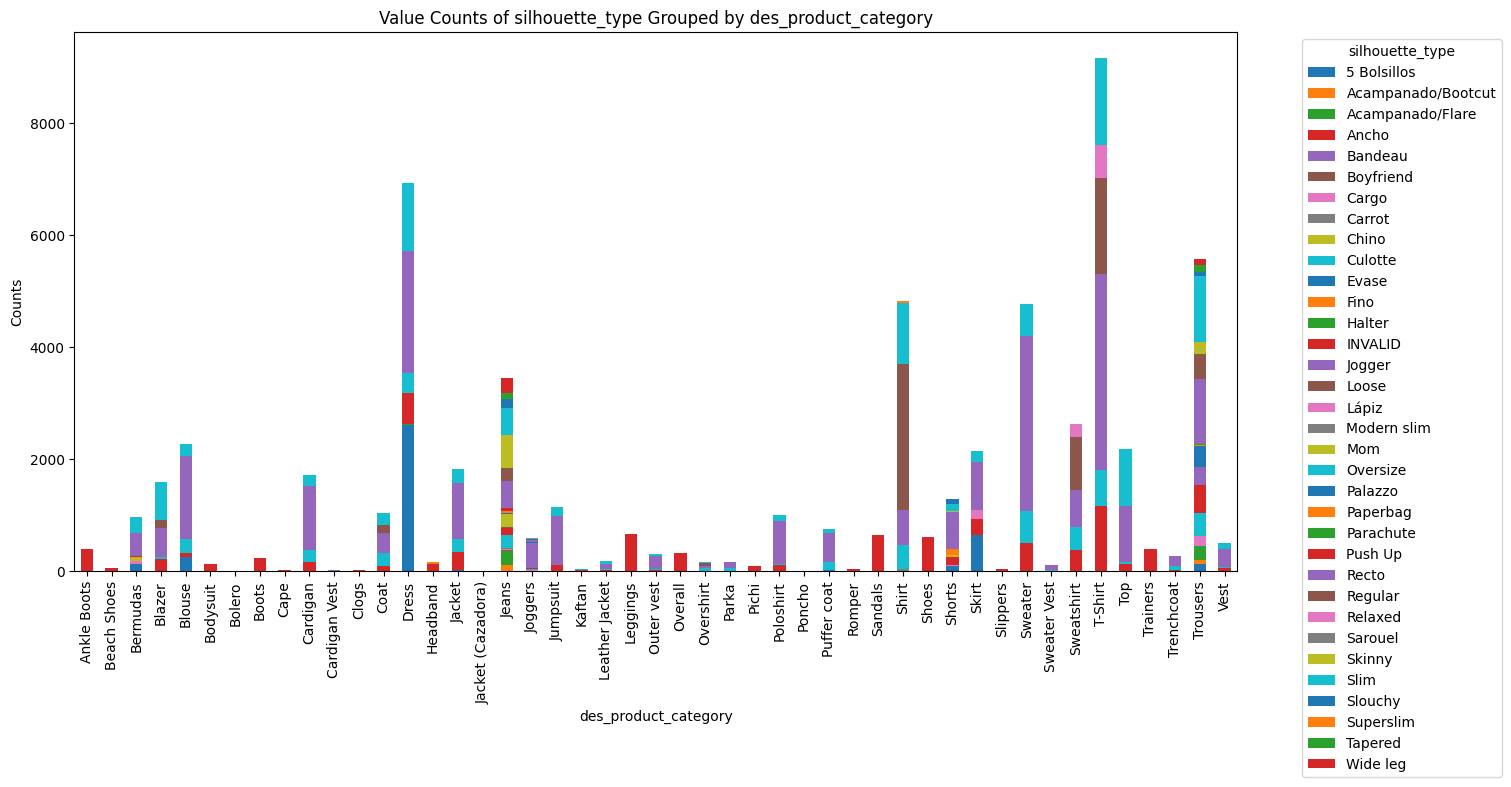

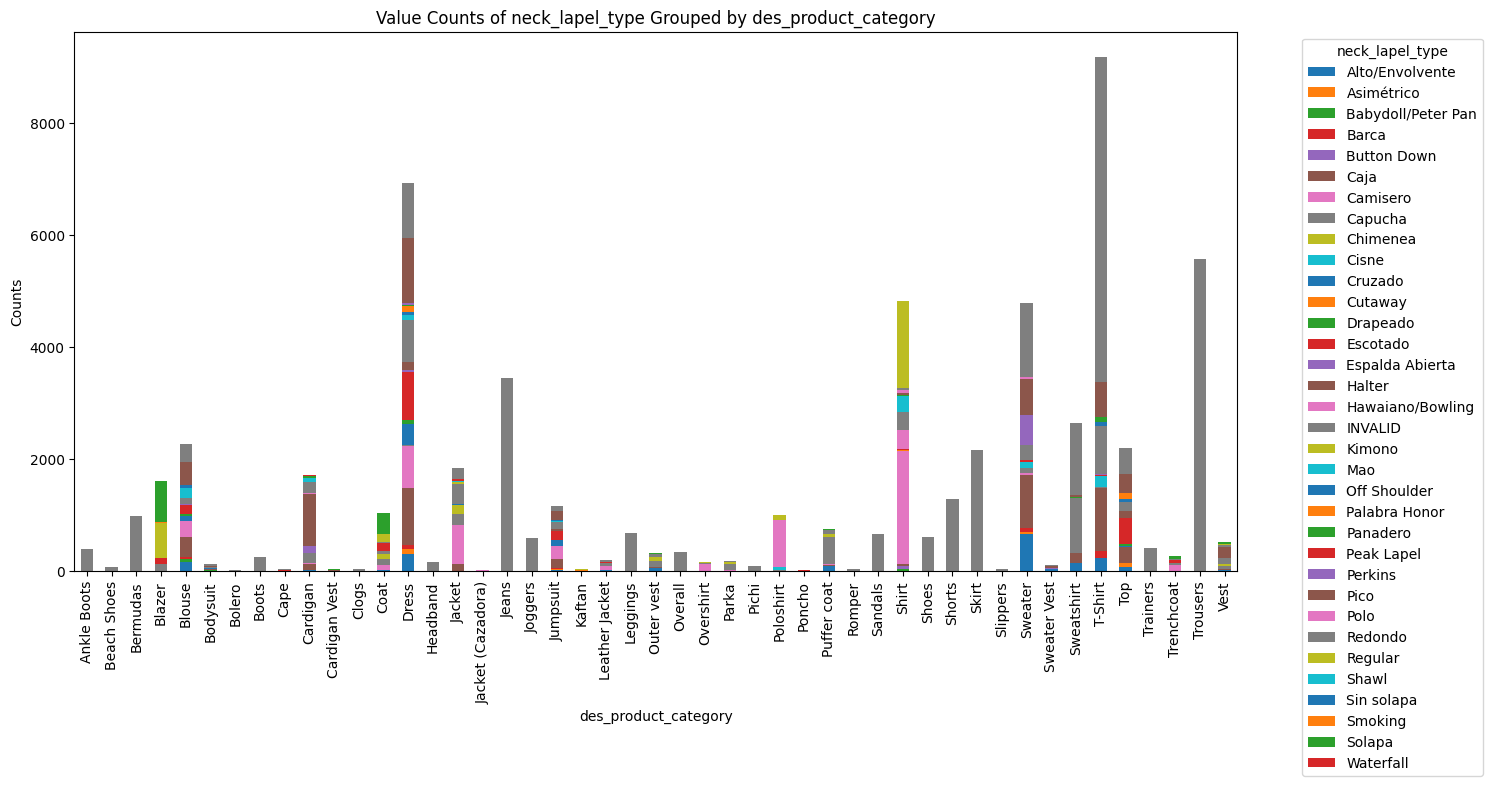

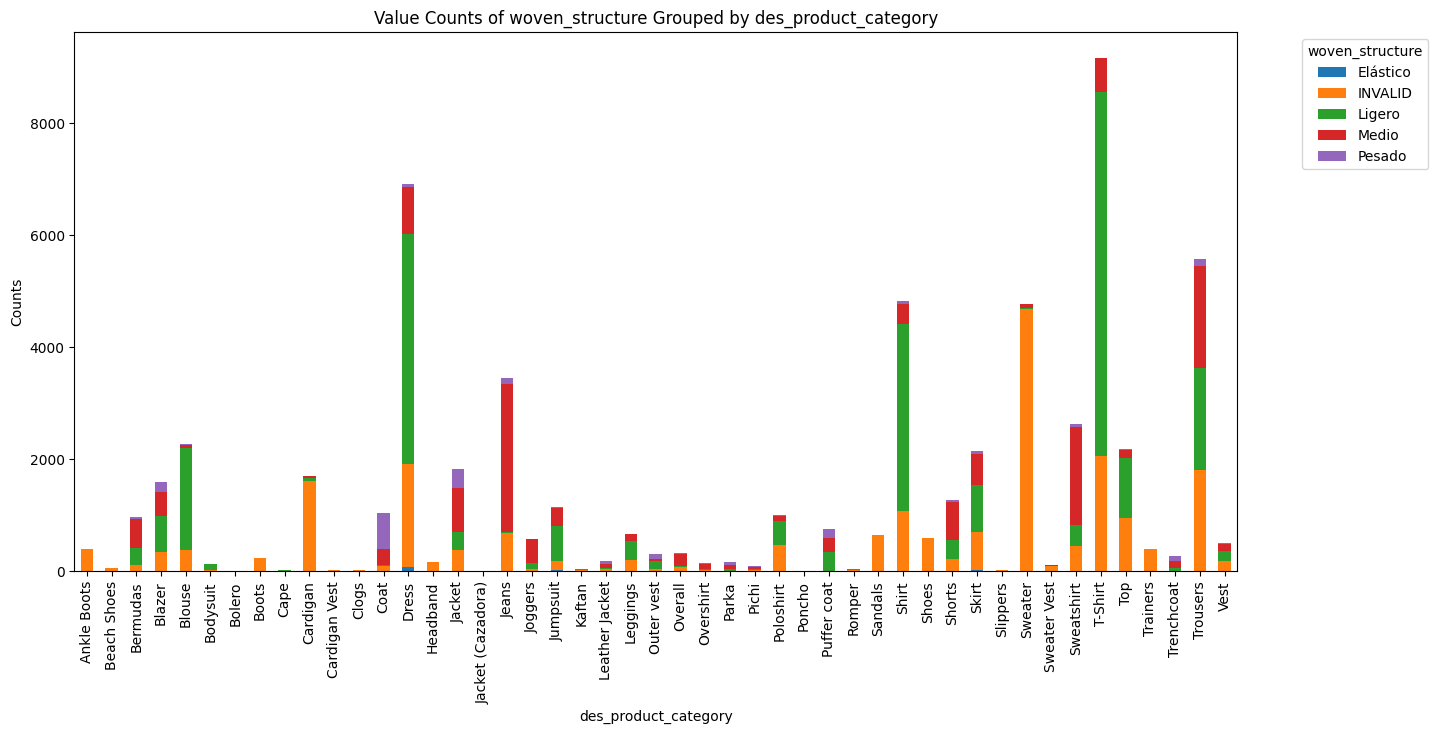

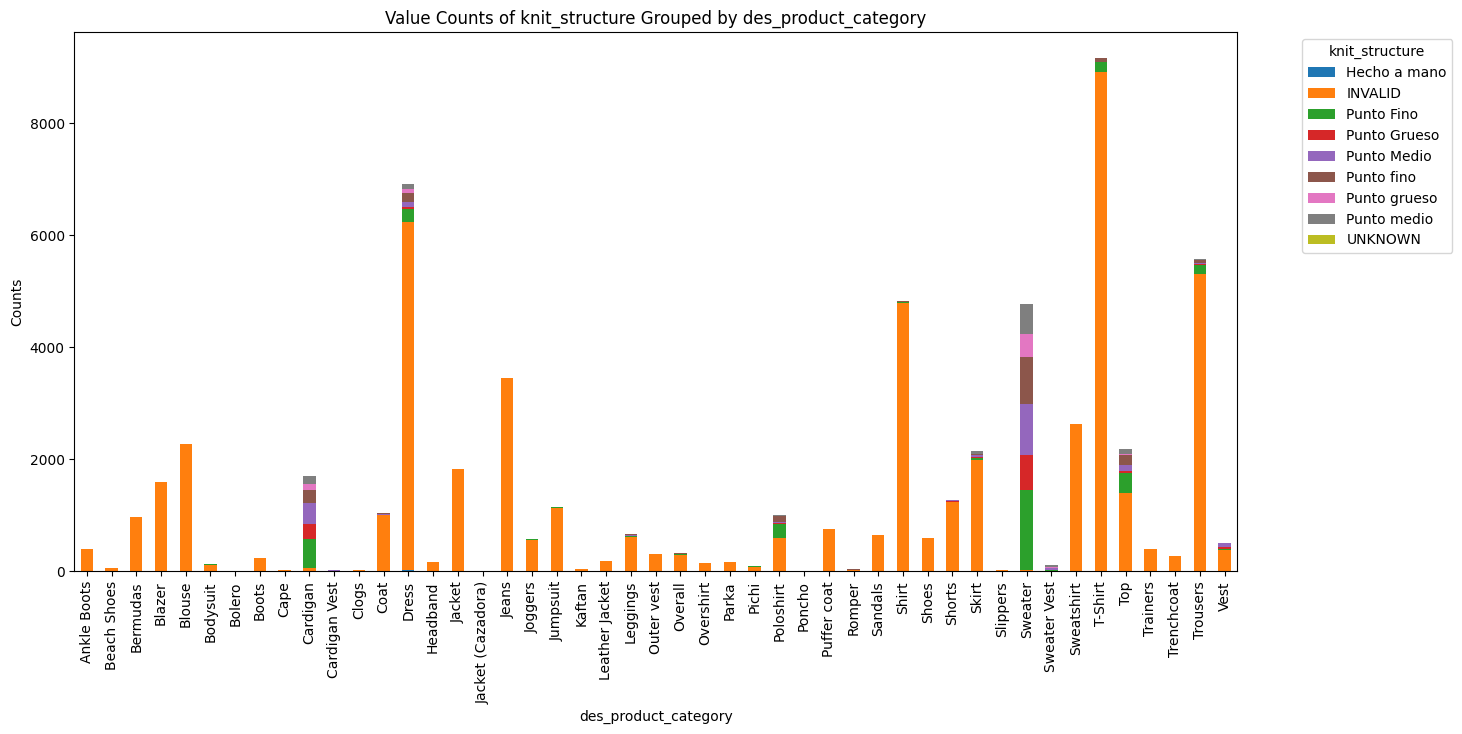

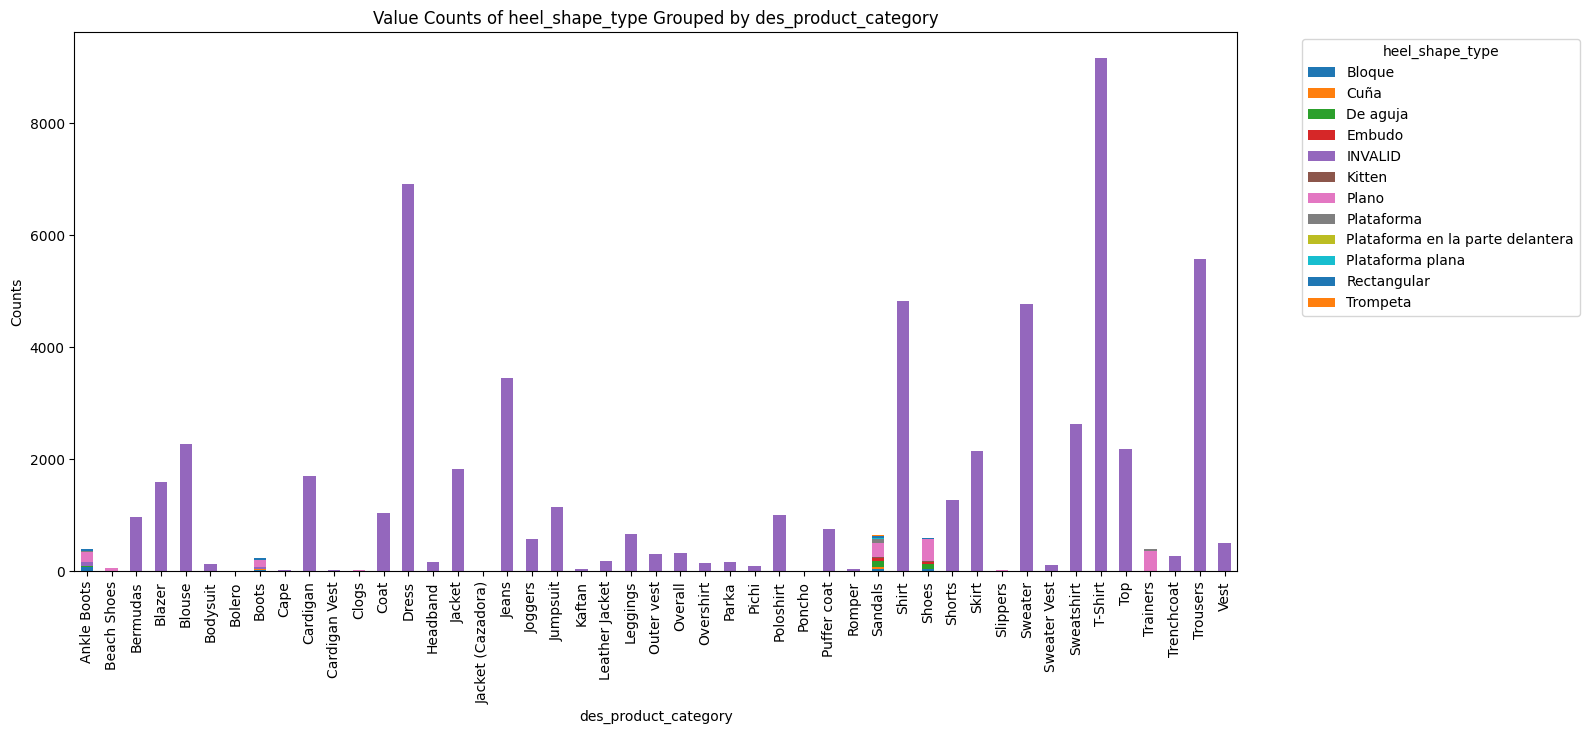

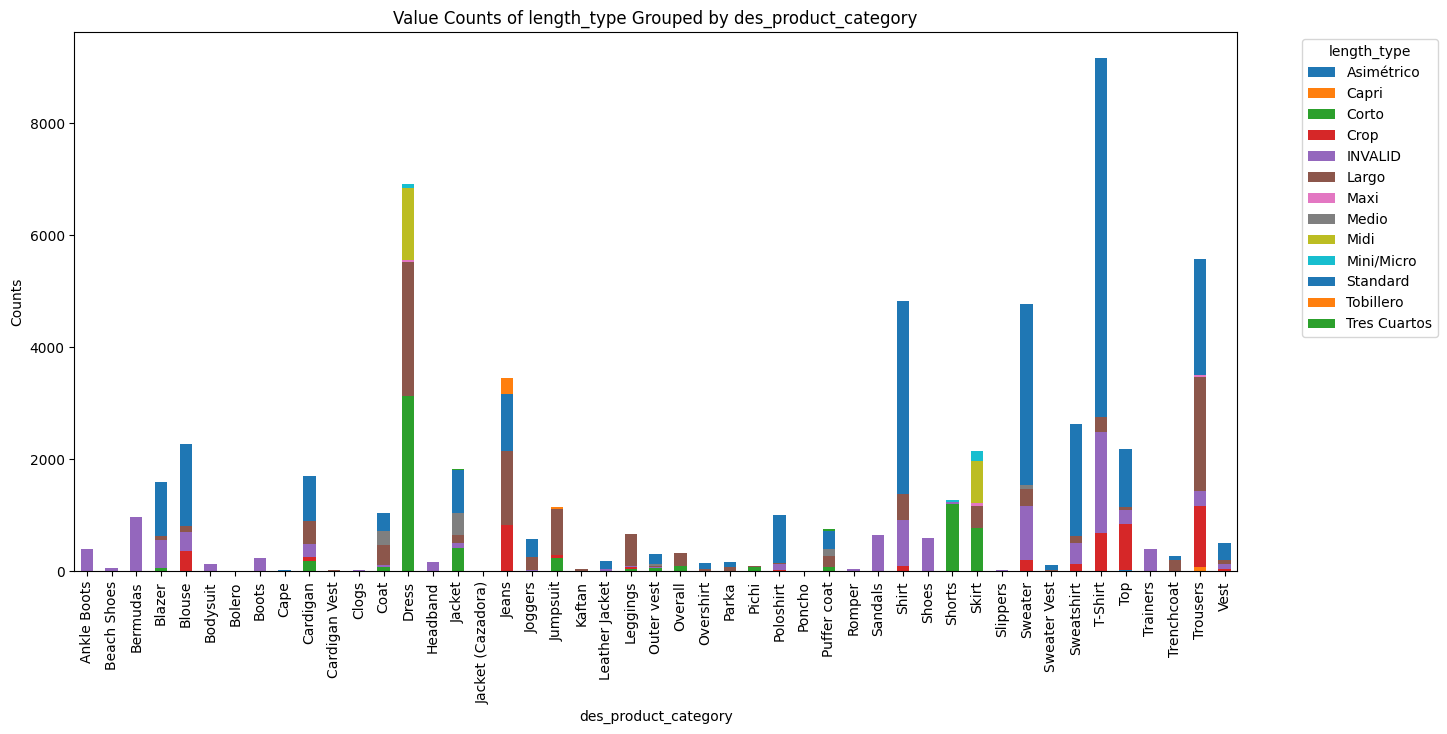

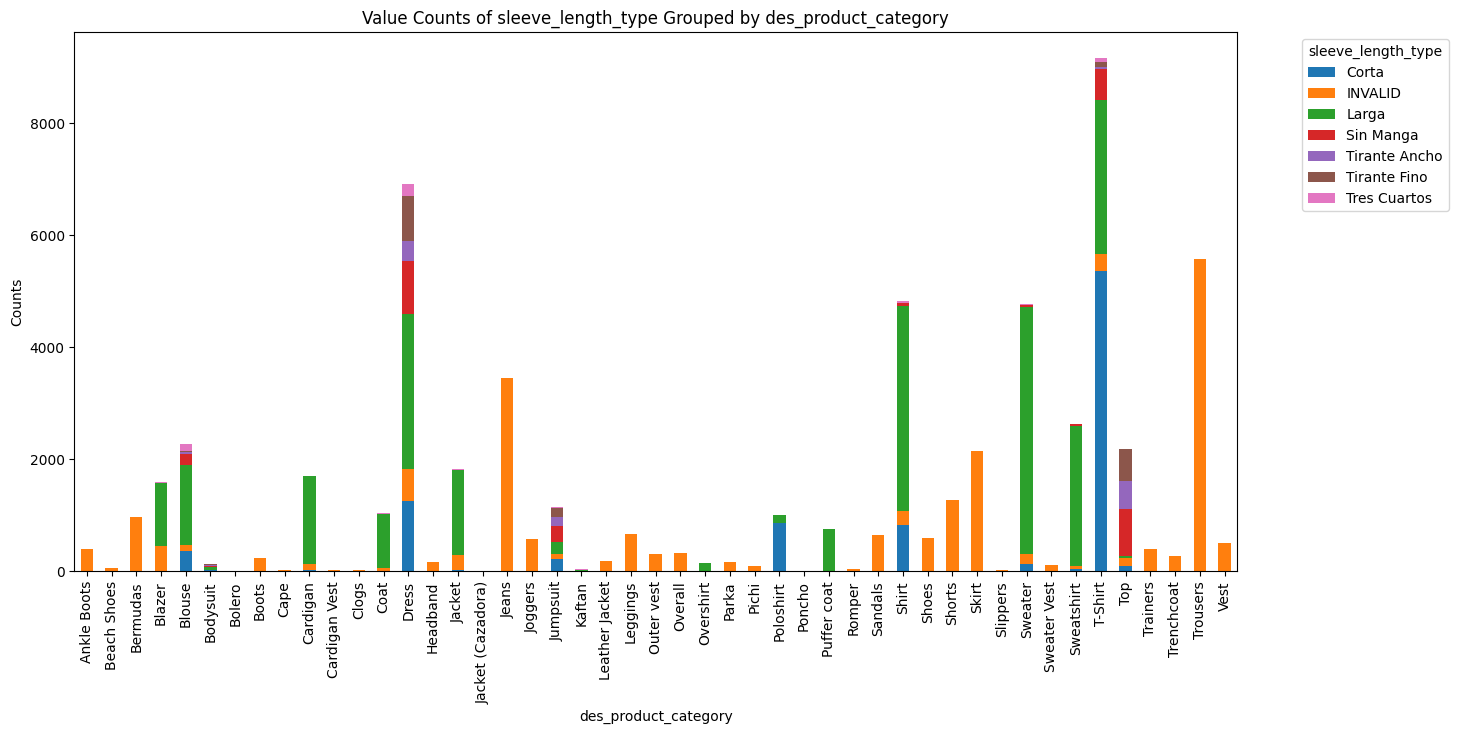

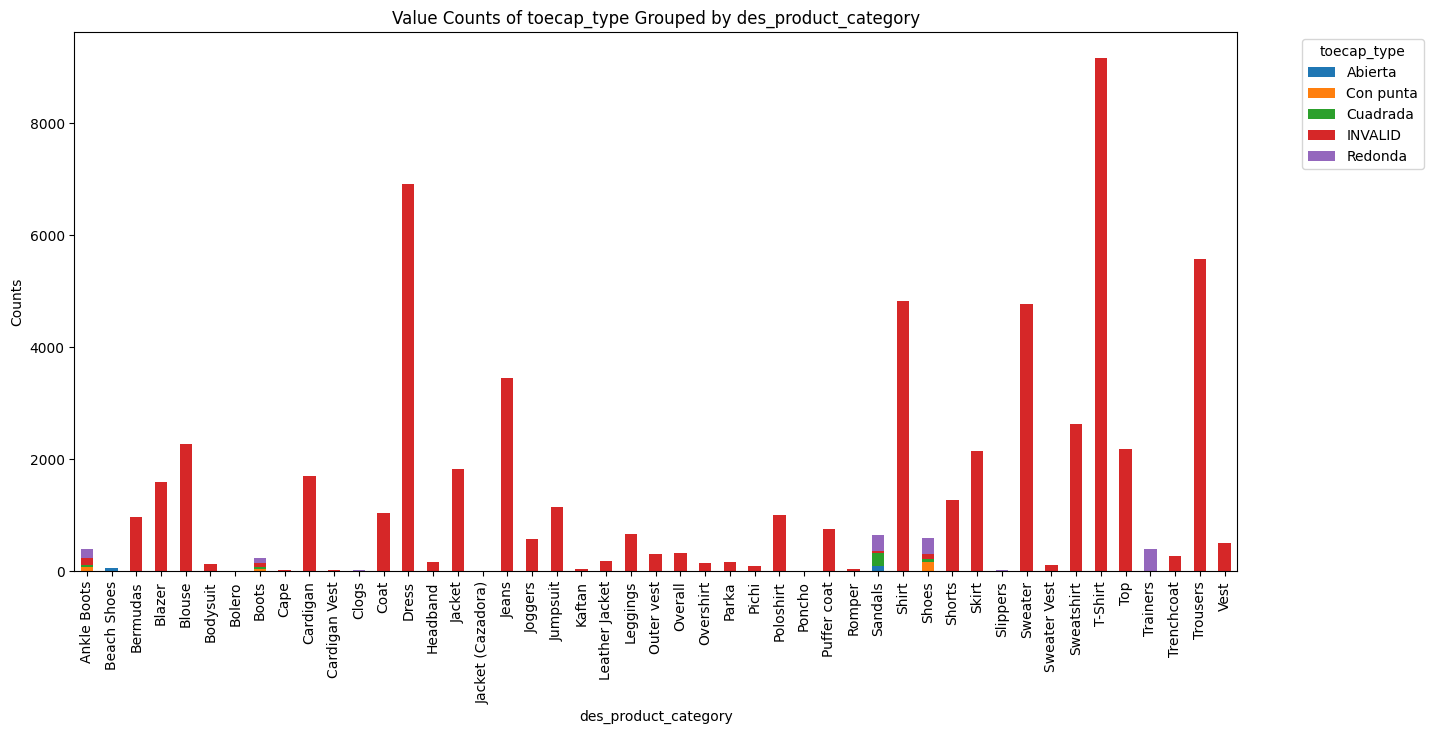

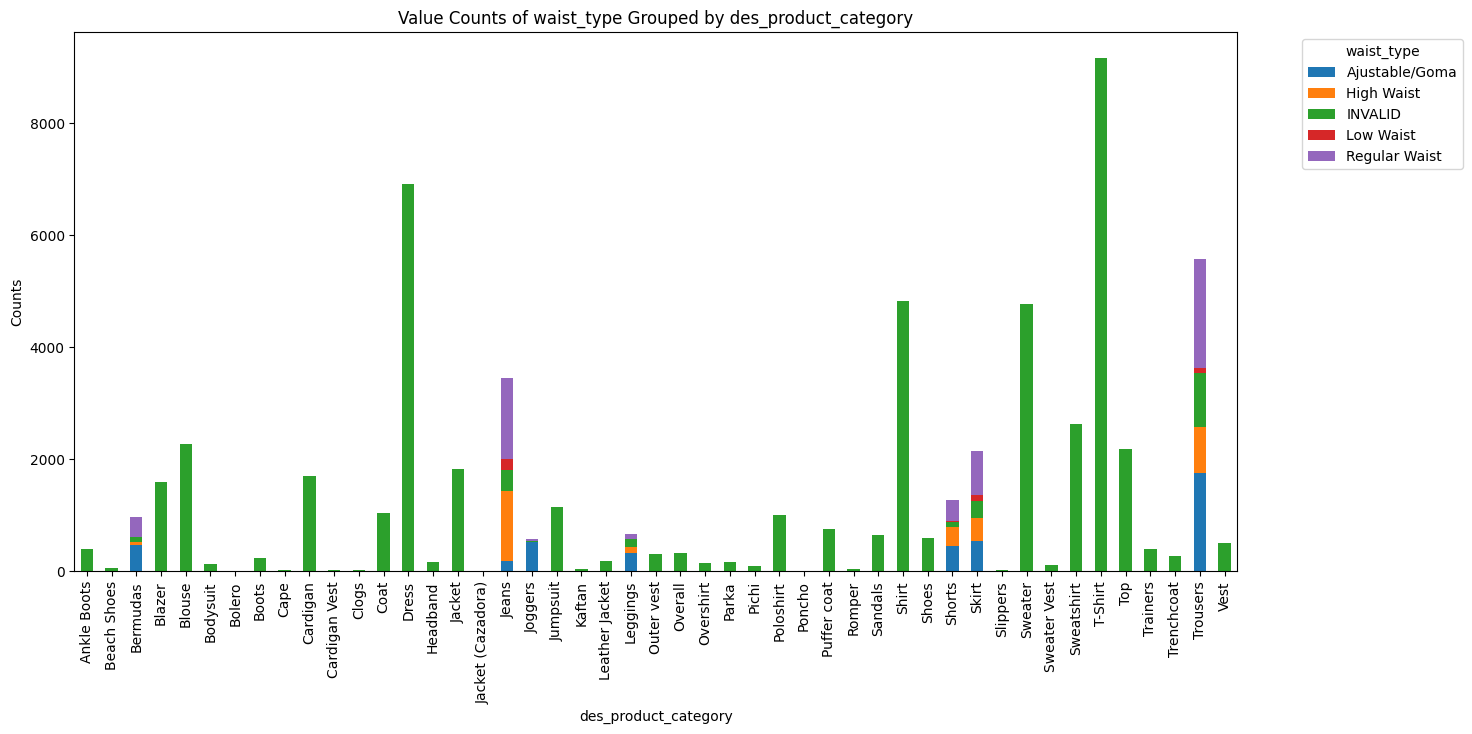

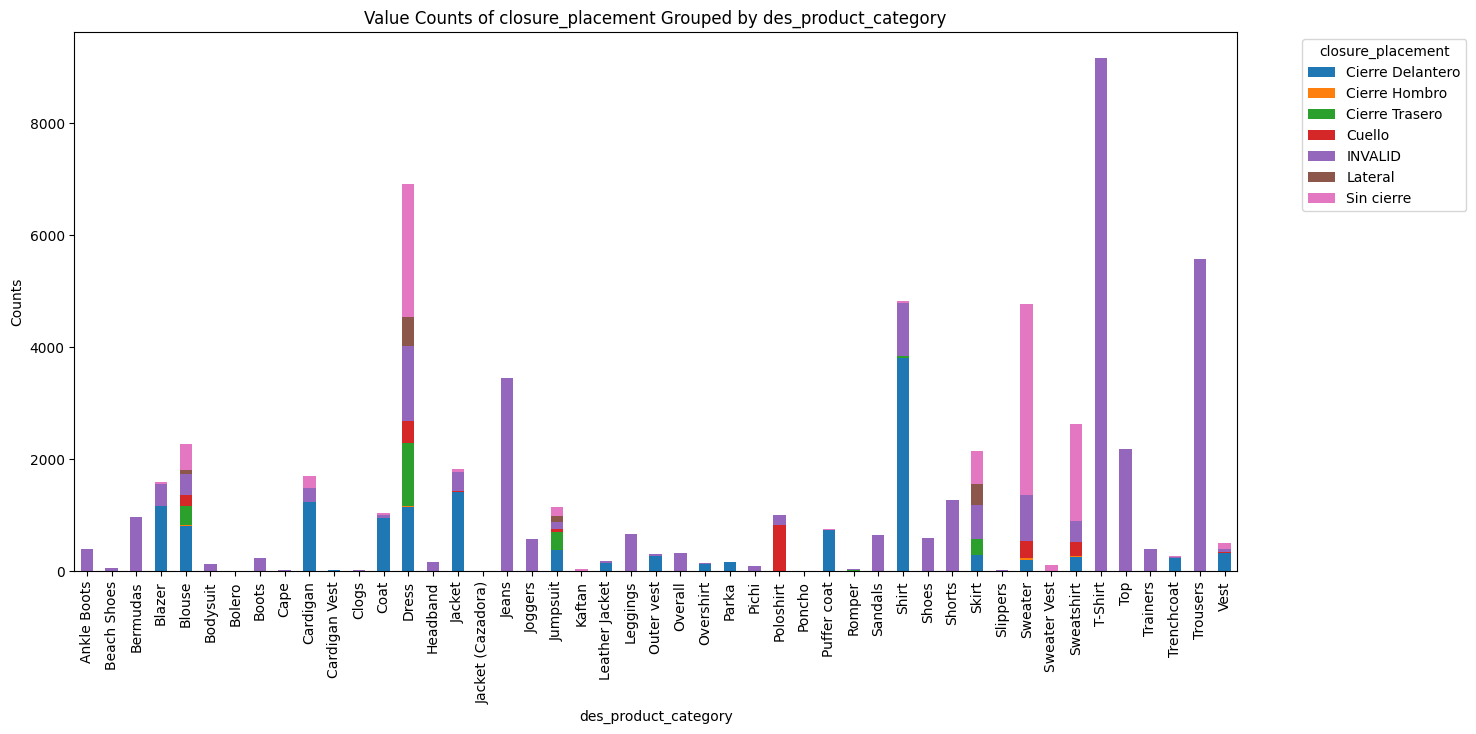

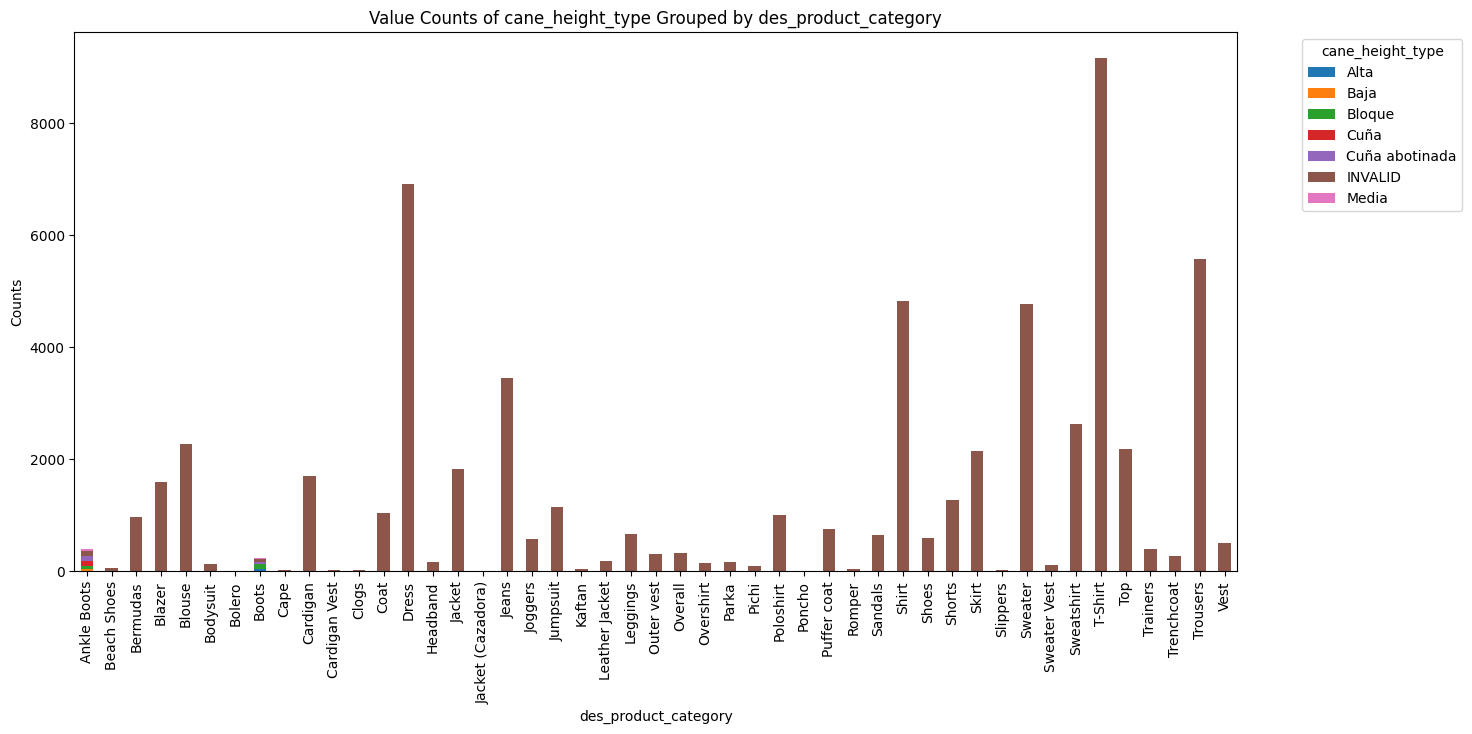

In [27]:
# Group by 'des_product_category' and plot the value counts for each column in a bar chart
for column in columns_to_analyze:
    grouped = df.groupby('des_product_type')[column].value_counts().unstack().fillna(0)
    grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(f'Value Counts of {column} Grouped by des_product_category')
    plt.xlabel('des_product_category')
    plt.ylabel('Counts')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()